### **1. Mengimpor Pustaka dan Mengutilisasi GPU**

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers

**Mengutilisasi GPU**

In [2]:
# Memeriksa apakah GPU tersedia dan mengatur TensorFlow untuk menggunakan GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        # Mengatur TensorFlow untuk menggunakan memori GPU secara dinamis
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print(f"Using GPU: {physical_devices}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found, using CPU instead.")

Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### **2. Mengimpor Dataset**

In [4]:
# Mengekstrak file zip dataset gambar X-ray dada ke direktori yang ditentukan
import zipfile
zip_ref = zipfile.ZipFile('dataset/chest_xray.zip', 'r')
zip_ref.extractall('dataset')
zip_ref.close()

### **3. Membaca dan Augmentasi Dataset Gambar**

In [5]:
# Menentukan path ke direktori dataset pelatihan, mengambil daftar kelas (kategori) dari direktori tersebut, dan mencetak daftar kelas
path = 'dataset/chest_xray/chest_xray/train'
classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
print(classes)

['NORMAL', 'PNEUMONIA']


In [6]:
# Menentukan direktori untuk gambar X-ray
NORMAL_dir = os.path.join(path + '/' + classes[0])
PNEUMONIA_dir = os.path.join(path + '/' + classes[1])

# Membuat daftar nama file di setiap direktori
normal_names = os.listdir(NORMAL_dir)
pneumonia_names = os.listdir(PNEUMONIA_dir)

# Mencetak jumlah gambar X-ray dada yang normal dan terinfeksi pneumonia dalam dataset pelatihan
print('Ada', len(normal_names), 'gambar X-ray dada yang normal dalam dataset pelatihan.')
print('Ada', len(pneumonia_names), 'gambar X-ray dada yang terinfeksi pneumonia dalam dataset pelatihan.')

Ada 1342 gambar X-ray dada yang normal dalam dataset pelatihan.
Ada 3876 gambar X-ray dada yang terinfeksi pneumonia dalam dataset pelatihan.


**Plot gambar X-ray dada yang normal**

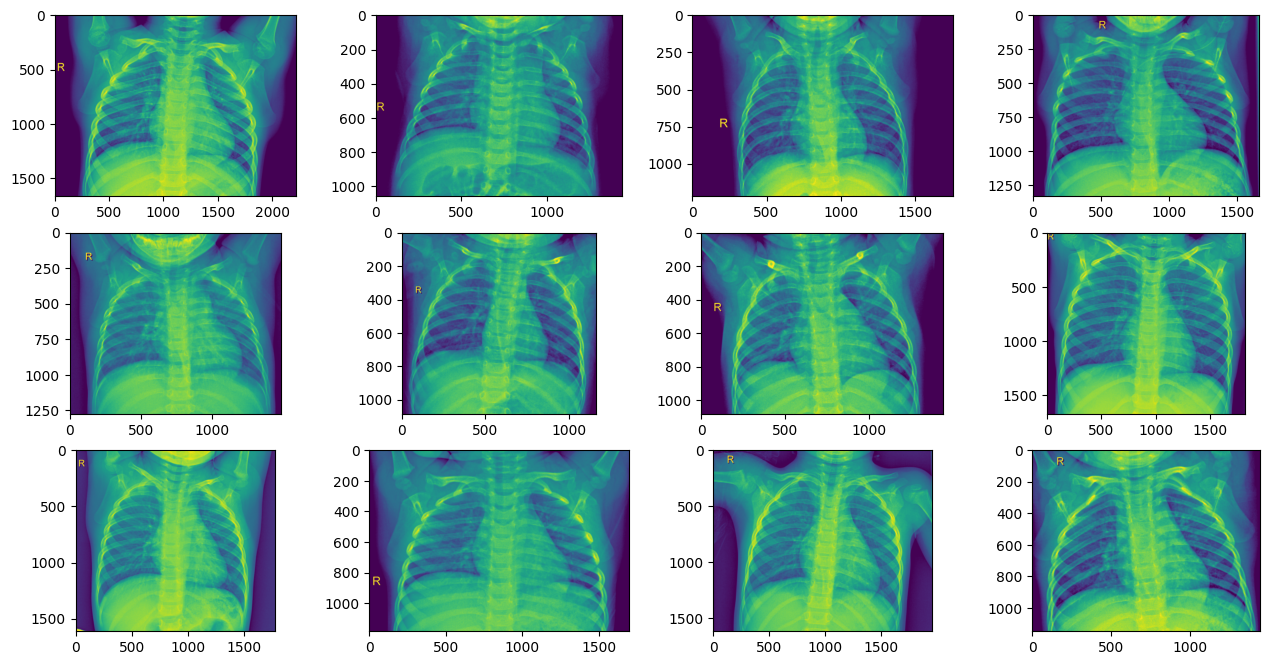

In [13]:
# Mengatur ukuran gambar
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Memilih indeks awal untuk gambar yang akan ditampilkan
pic_index = 210

# Membuat daftar path file untuk 16 gambar yang akan ditampilkan
normal_images = [os.path.join(NORMAL_dir, fname)
            for fname in normal_names[pic_index-12:pic_index]]

# Melakukan loop melalui path gambar dan menampilkan setiap gambar dalam subplot
for i, img_path in enumerate(normal_images):
    sp = plt.subplot(3, 4, i+1)

    # Membaca gambar menggunakan fungsi imread() dari Matplotlib
    img = mpimg.imread(img_path)
    plt.imshow(img)

# Menampilkan plot dengan 16 gambar dalam susunan 4x4
plt.show()

**Plot gambar X-ray dada yang terinfeksi Pneumonia**

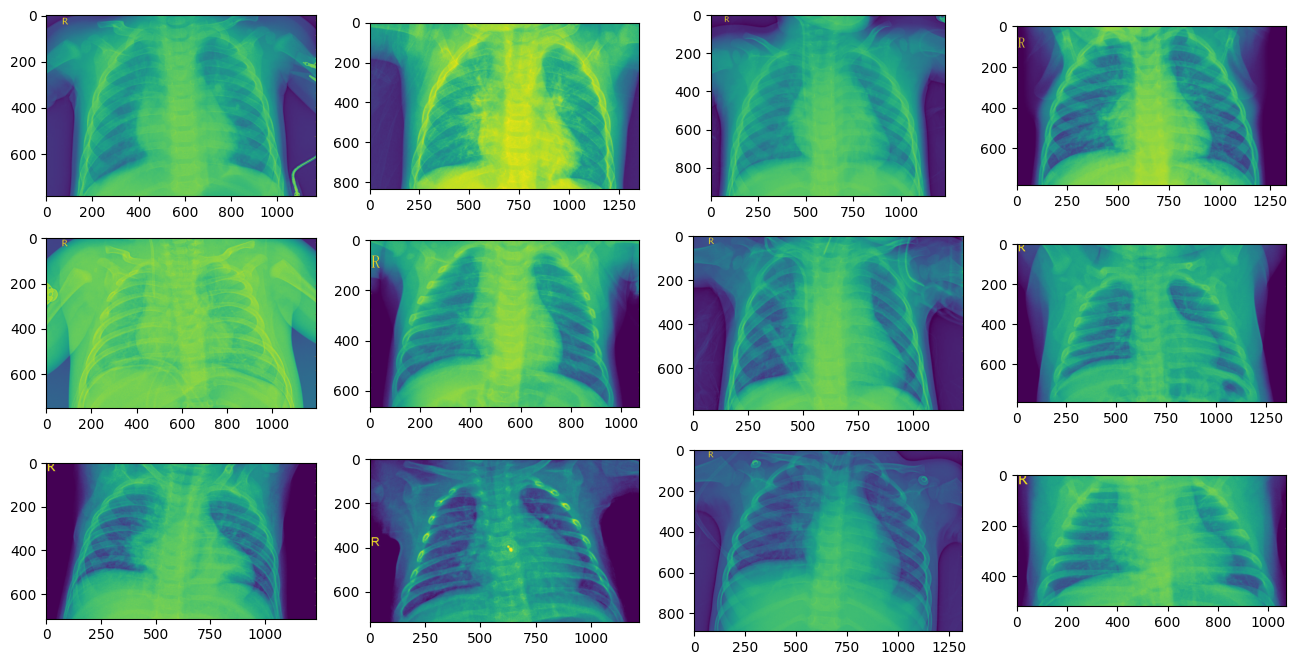

In [14]:
# Mengatur ukuran gambar
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Memilih indeks awal untuk gambar yang akan ditampilkan
pic_index = 210

# Membuat daftar path file untuk 16 gambar yang akan ditampilkan
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
                    for fname in pneumonia_names[pic_index-12:pic_index]]

# Melakukan loop melalui path gambar dan menampilkan setiap gambar dalam subplot
for i, img_path in enumerate(pneumonia_images):
    sp = plt.subplot(3, 4, i+1)

    # Membaca gambar menggunakan fungsi imread() dari Matplotlib
    img = mpimg.imread(img_path)
    plt.imshow(img)

# Menampilkan plot dengan 16 gambar dalam susunan 4x4
plt.show()

### **4. Persiapan Data untuk Training**

In [17]:
# Memuat dataset training dengan label yang diinferensikan dan mode label kategorikal
train = keras.utils.image_dataset_from_directory(
	directory='dataset/chest_xray/chest_xray/train',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))

# Memuat dataset Testing dengan label yang diinferensikan dan mode label kategorikal
test = keras.utils.image_dataset_from_directory(
	directory='dataset/chest_xray/chest_xray/test',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))

# Memuat dataset validation dengan label yang diinferensikan dan mode label kategorikal
validation = keras.utils.image_dataset_from_directory(
	directory='dataset/chest_xray/chest_xray/val',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


### **5. Arsitektur Model**

In [ ]:
# Membangun model CNN Sequential
model = tf.keras.models.Sequential([
    # Lapisan konvolusi pertama
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    # Lapisan max pooling pertama
    layers.MaxPooling2D(2, 2),
    
    # Lapisan konvolusi kedua
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Lapisan max pooling kedua
    layers.MaxPooling2D(2, 2),
    
    # Lapisan konvolusi ketiga
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Lapisan max pooling ketiga
    layers.MaxPooling2D(2, 2),
    
    # Lapisan konvolusi keempat
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Lapisan max pooling keempat
    layers.MaxPooling2D(2, 2),

    # Lapisan flatten (untuk mengubah data 2D menjadi 1D)
    layers.Flatten(),
    
    # Lapisan dense pertama
    layers.Dense(256, activation='relu'),
    # Lapisan dropout pertama
    layers.Dropout(0.1),
    # Lapisan batch normalization pertama
    layers.BatchNormalization(),
    
    # Lapisan dense kedua
    layers.Dense(512, activation='relu'),
    # Lapisan dropout kedua
    layers.Dropout(0.1),
    # Lapisan batch normalization kedua
    layers.BatchNormalization(),
    
    # Lapisan dense ketiga
    layers.Dense(512, activation='relu'),
    # Lapisan dropout ketiga
    layers.Dropout(0.2),
    # Lapisan batch normalization ketiga
    layers.BatchNormalization(),
    
    # Lapisan dense keempat
    layers.Dense(512, activation='relu'),
    # Lapisan dropout keempat 
    layers.Dropout(0.2),
    # Lapisan batch normalization keempat
    layers.BatchNormalization(),
    
    # Lapisan output
    layers.Dense(2, activation='sigmoid')
])

# Mengkompilasi model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Menampilkan ringkasan model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)      

### **6. Melatih Model**

In [21]:
history = model.fit(
    train,
    verbose=1,
	epochs=10,
	validation_data=validation
)

Epoch 1/10
163/163 [==============================] - 39s 209ms/step - loss: 0.4072 - accuracy: 0.8453 - val_loss: 1.7438 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 32s 197ms/step - loss: 0.2877 - accuracy: 0.8913 - val_loss: 2.7571 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 32s 194ms/step - loss: 0.2823 - accuracy: 0.8923 - val_loss: 3.7786 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 32s 193ms/step - loss: 0.1519 - accuracy: 0.9480 - val_loss: 4.8825 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 32s 194ms/step - loss: 0.1465 - accuracy: 0.9446 - val_loss: 2.0762 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 32s 193ms/step - loss: 0.1237 - accuracy: 0.9559 - val_loss: 3.1039 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 32s 193ms/step - loss: 0.1144 - accuracy: 0.9580 - val_loss: 3.4148 - val_ac

### **7. Mengevaluasi Model**

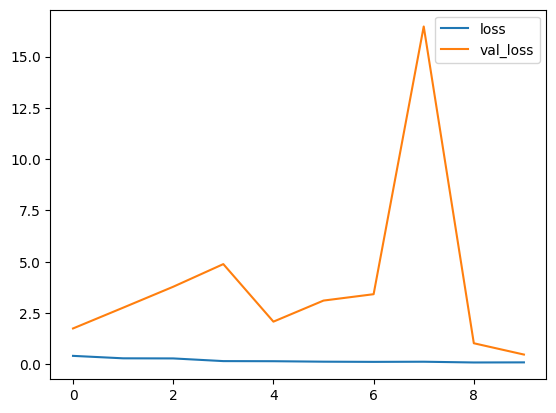

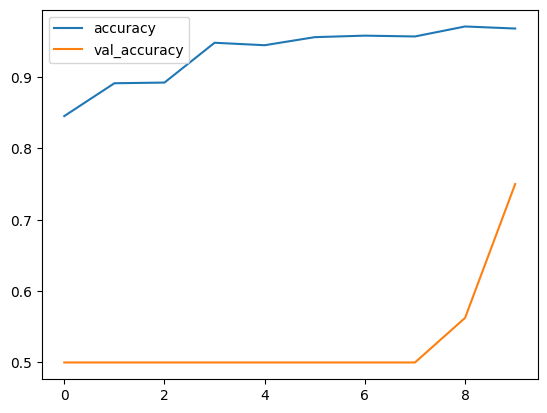

In [22]:
# Mengonversi riwayat pelatihan model menjadi DataFrame Pandas
history_df = pd.DataFrame(history.history)

# Memplot metrik loss untuk pelatihan dan validasi
history_df.loc[:, ['loss', 'val_loss']].plot()

# Memplot metrik akurasi untuk pelatihan dan validasi
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

# Menampilkan plot
plt.show()

**Menemukan keakuratan pada Dataset Tes**

In [24]:
loss, accuracy = model.evaluate(test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))

20/20 [==============================] - 2s 74ms/step - loss: 0.7420 - accuracy: 0.7580
The accuracy of the model on test dataset is 76.0


### **8. Prediksi dengan Model yang Sudah Dilatih**

**Prediksi dengan gambar X-ray dada yang normal**

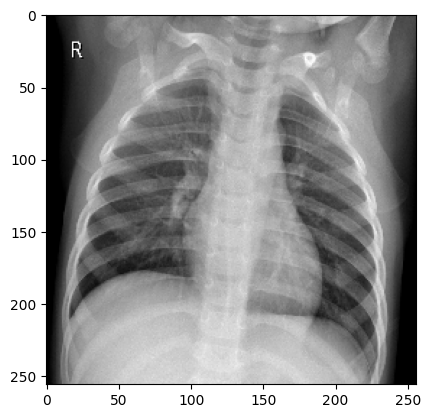

1/1 [==============================] - 0s 22ms/step
Normal


In [30]:
# Menentukan path ke direktori gambar
test_dir = "dataset/chest_xray/chest_xray/test/NORMAL"

# Mendapatkan daftar semua file gambar dalam direktori
image_files = os.listdir(test_dir)

# Memilih file gambar secara acak dari daftar
random_image_file = random.choice(image_files)

# Membuat path lengkap ke file gambar yang dipilih secara acak
random_image_path = os.path.join(test_dir, random_image_file)

# Memuat gambar dari path yang dipilih secara acak
test_image = tf.keras.utils.load_img(
    random_image_path,
    target_size=(256, 256))

# Menampilkan gambar yang dimuat
plt.imshow(test_image)
plt.show()

# Mengonversi gambar yang dimuat menjadi array NumPy dan
# memperluas dimensinya agar sesuai dengan bentuk input yang diharapkan oleh model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Menggunakan model yang sudah dilatih untuk membuat prediksi pada gambar input
result = model.predict(test_image)

# Mengekstrak probabilitas gambar input termasuk
# ke setiap kelas dari hasil prediksi
class_probabilities = result[0]

# Menentukan kelas dengan probabilitas tertinggi dan mencetak labelnya
if class_probabilities[0] > class_probabilities[1]:
    print("Normal")
else:
    print("Pneumonia")

**Prediksi dengan gambar X-ray dada yang terinfeksi pneumonia**

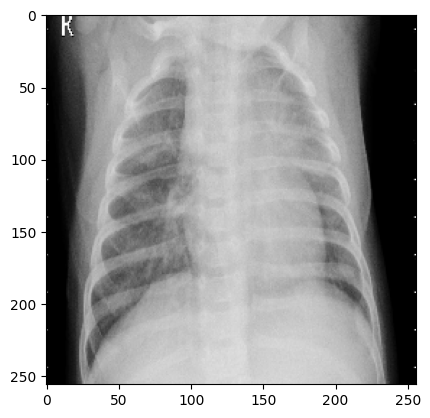

1/1 [==============================] - 0s 21ms/step
Pneumonia


In [31]:
# Menentukan path ke direktori gambar
test_dir = "dataset/chest_xray/chest_xray/test/PNEUMONIA"

# Mendapatkan daftar semua file gambar dalam direktori
image_files = os.listdir(test_dir)

# Memilih file gambar secara acak dari daftar
random_image_file = random.choice(image_files)

# Membuat path lengkap ke file gambar yang dipilih secara acak
random_image_path = os.path.join(test_dir, random_image_file)

# Memuat gambar dari path yang dipilih secara acak
test_image = tf.keras.utils.load_img(
    random_image_path,
    target_size=(256, 256))

# Menampilkan gambar yang dimuat
plt.imshow(test_image)
plt.show()

# Mengonversi gambar yang dimuat menjadi array NumPy dan
# memperluas dimensinya agar sesuai dengan bentuk input yang diharapkan oleh model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Menggunakan model yang sudah dilatih untuk membuat prediksi pada gambar input
result = model.predict(test_image)

# Mengekstrak probabilitas gambar input termasuk
# ke setiap kelas dari hasil prediksi
class_probabilities = result[0]

# Menentukan kelas dengan probabilitas tertinggi dan mencetak labelnya
if class_probabilities[0] > class_probabilities[1]:
    print("Normal")
else:
    print("Pneumonia")

### **9. Menyimpan Model yang Sudah Dilatih**

In [32]:
model.save('pneumonia_cnn.h5')